In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_pointer=open("Datasets/diabetes2.csv")
A=np.loadtxt(file_pointer,delimiter=",")
# print(A[0:10,:])

In [3]:
n=A.shape[1]-1
m=600 # no. of training examples
mtest=A.shape[0]-m

X=A[0:m,0:n]
X=np.hstack((np.ones([m,1]),X))
y=A[0:m,n:n+1]
Xtest=A[m:m+mtest,0:n]
Xtest=np.hstack((np.ones([mtest,1]),Xtest))
ytest=A[m:m+mtest,n:n+1]

theta=np.zeros([n+1,1])
# print(theta.shape)
# print(X.shape)
# print(X@theta)

In [4]:
f_scale=np.array([[1,2,4,1,1,1,1,1,1.5]])
X/=f_scale
Xtest/=f_scale
# print(X)

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def cost(theta,y,yp,m):
    m=y.shape[0]
    # print(m)
    return np.sum(y*np.log(yp)+(1-y)*np.log(1-yp))/(-m)

In [7]:
def gradient_j(X,yp,y):
    m=y.shape[0]
    return (X.T)@(yp-y)/m

In [8]:
epochs=1000
alpha=0.0001
j=[0]*epochs
correctness=[0]*epochs

In [9]:
def check(yp,y):
    m=y.shape[0]
    correct=0
    for i in range(m):
        if yp[i][0]>0.5:
            yp[i][0]=1
        else:
            yp[i][0]=0
        if yp[i][0]==y[i][0]:
            correct+=1
    return correct

In [10]:
for i in range(epochs):
    yp=sigmoid(X@theta)
    # print(yp)
    j[i]=cost(theta,y,yp,m)
    theta=theta-alpha*gradient_j(X,yp,y)
    correctness[i]=check(yp,y)/m
# print(j)

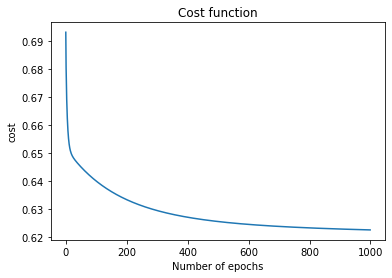

Accuracy on testing data is 109/168 i.e. 64.88095238095238%


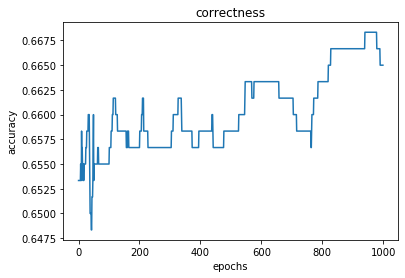

In [11]:
yp_test=Xtest@theta
test_acc=check(yp_test,ytest)
plt.plot(range(epochs),j)
plt.xlabel("Number of epochs")
plt.ylabel("cost")
plt.title("Cost function")
plt.savefig("loss.png")
plt.show()

plt.plot(range(epochs),correctness)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("correctness")
plt.savefig("correctnes.png")
plt.show()
yp=X@theta
acc=check(yp,y)

# print(f"Accuracy on training data is {acc}/{m} i.e. {acc*100/m}%")
print(f"Accuracy on testing data is {test_acc}/{mtest} i.e. {test_acc*100/mtest}%")